### Data Mining
#### E2 - Python Text Analysis

*Presented by Andres Martinez*.
Universidad de los Andes. 2019

In [1]:
# Librerias
import pandas as pd
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 2.1 (Base)
Complete the function that calculates the similarities of all texts in the dataframe

In [2]:
data = pd.DataFrame(columns=['Text', 'Undergrad', 'Semester', 'Age', 'Company'])

In [3]:
data.loc[0] = ['Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.',
               'Ingenieria Industrial', 0, 25, 'Uniandes']
data.loc[1] = ['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt. Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur? Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?',
               'Ingenieria Electrica', 2, 32, 'Bancolombia']
data.loc[2] = ['At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita distinctio. Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus. Temporibus autem quibusdam et aut officiis debitis aut rerum necessitatibus saepe eveniet ut et voluptates repudiandae sint et molestiae non recusandae. Itaque earum rerum hic tenetur a sapiente delectus, ut aut reiciendis voluptatibus maiores alias consequatur aut perferendis doloribus asperiores repellat.',
               'Ingenieria Sistemas', 1, 22, 'Colpatria']
data.loc[3] = ['At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita distinctio. Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus. Temporibus autem quibusdam et aut officiis debitis aut rerum necessitatibus saepe eveniet ut et voluptates repudiandae sint et molestiae non recusandae. Itaque earum rerum hic tenetur a sapiente delectus, ut aut reiciendis voluptatibus maiores alias consequatur aut perferendis doloribus asperiores repellat.',
               'Estadistica', 1, 26, 'Colpatria']

Has been complete the missing code into the body of the next cell.

In [4]:
def similarity(New_Data):

    results = pd.DataFrame(0, index=New_Data.index, columns=New_Data.index)
    
           # ***************************************************** # 

    for x_row in range(results.shape[0]):
        for x_col in range(results.shape[0]):
            results.at[x_row,x_col] = fuzz.ratio(New_Data.loc[x_row][0], New_Data.loc[x_col][0])

            # ***************************************************** # 
            
    assert results.shape == (New_Data.shape[0], New_Data.shape[0])
    
    return results

To calculate the similarity between the senteces, was used **FuzzyWuzzy**. For more details check https://github.com/seatgeek/fuzzywuzzy

In [5]:
similarity(data)

,0,1,2,3
0,100,49,40,40
1,49,100,45,45
2,40,45,100,100
3,40,45,100,100


#### Exercise 2.1 (Implementation)

From the information uploaded on Sicua+ (file **E2-Data**), below can find the similarity analysis.

In [6]:
E2_Data = pd.read_excel('E2-Data.xlsx', sep=';')
E2_Data.head(10)

,Text,Undergrad,Semester,Age,Company
0,Uno de los criterios más importantes en la sel...,Ingeniería de sistemas,4,46,ETB
1,"Actualmente para las empresas, los científicos...",Administración de empresas,2,38,Interactivo contact center sa
2,Dos de las principales razones por las que a p...,Economía,2,29,Bancamía
3,Differences of a Data Scientist and a Data Eng...,Administración de empresas,2,25,Universidad de los andes
4,Existen diferencias significativas en el perfi...,Ingeniería industrial,2,25,Mullen lowe SSP3
5,El ingeniero de datos es un profesional dedica...,Estadística,4,33,Nielsen
6,NaN,Ingeniería industrial,2,30,Universidad de los andes
7,"En términos de costo, SAS es un software comer...",Ingeniería de sistemas,2,30,Telefónica
8,Las diferencias de un científico de datos y un...,Estadística,2,34,Icfes
9,Siendo dos grandes software's de analítica los...,Estadística,2,33,Campus BBVA


There are **Missing Values** (or *NaN*). Let's delete them!

In [7]:
E2_Data = E2_Data.dropna(how='any')
E2_Data = E2_Data.reset_index()
E2_Data = E2_Data.drop('index', axis=1)
E2_Data.head()

,Text,Undergrad,Semester,Age,Company
0,Uno de los criterios más importantes en la sel...,Ingeniería de sistemas,4,46,ETB
1,"Actualmente para las empresas, los científicos...",Administración de empresas,2,38,Interactivo contact center sa
2,Dos de las principales razones por las que a p...,Economía,2,29,Bancamía
3,Differences of a Data Scientist and a Data Eng...,Administración de empresas,2,25,Universidad de los andes
4,Existen diferencias significativas en el perfi...,Ingeniería industrial,2,25,Mullen lowe SSP3


Now, with the Dataframe correctly set without missing values, the similarity function can be launch!

In [8]:
similarity(E2_Data)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,100,44,44,44,46,44,44,43,44,45,...,45,44,44,45,45,45,45,45,38,43
1,44,100,43,49,48,47,44,45,45,45,...,45,47,47,48,46,46,47,47,42,46
2,44,43,100,43,44,42,43,40,43,46,...,44,44,44,43,42,43,43,44,34,42
3,44,49,43,100,49,46,44,46,45,45,...,44,47,47,49,46,47,46,49,40,47
4,46,48,44,49,100,47,45,49,45,46,...,45,48,49,48,47,47,47,48,42,46
5,44,47,42,46,47,100,43,47,43,44,...,44,45,46,46,44,45,45,46,42,46
6,44,44,43,44,45,43,100,43,44,45,...,44,44,44,44,44,44,44,45,38,43
7,43,45,40,46,49,47,43,100,44,43,...,43,44,45,45,45,47,45,46,45,47
8,44,45,43,45,45,43,44,44,100,45,...,45,42,44,43,44,44,44,44,41,44
9,45,45,46,45,46,44,45,43,45,100,...,45,44,44,44,44,45,45,45,38,44


This matrix seems complex and hard to understand... Because that, has been created the following graph as visual aid to determine interest points.

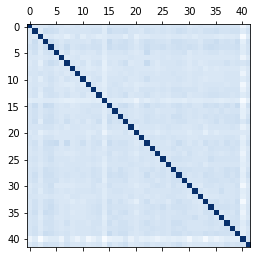

In [9]:
sim_plot = similarity(E2_Data)
plt.matshow(sim_plot, cmap=plt.cm.Blues)
plt.show()

#### Exercise 2.2
Calculate descriptive statistics of the dataset

* Pivot tables analyzing companies, universities, age and master semester.

Let's calculate the mean of the dataset by Undergraduate program

In [10]:
Data_Mean = pd.pivot_table(E2_Data, index='Undergrad', aggfunc=np.mean)
Data_Mean

,Age,Semester
Undergrad,,
Administración de empresas,29.666667,2.0
Economía,26.111111,2.0
Estadística,35.000000,2.4
Ingeniería de mercados,23.000000,2.0
Ingeniería de sistemas,32.125000,3.0
Ingeniería de telecomunicaciones,31.000000,2.0
Ingeniería electrónica,32.000000,2.0
Ingeniería eléctrica,27.666667,2.0
Ingeniería industrial,26.000000,2.0


With the mean calculated, it´s important to determinate what is the standard deviation (by Undergraduate program as well)

In [11]:
Data_Std = pd.pivot_table(E2_Data, index='Undergrad', aggfunc=np.std)
Data_Std

,Age,Semester
Undergrad,,
Administración de empresas,7.234178,0.000000
Economía,2.260777,0.000000
Estadística,5.147815,0.894427
Ingeniería de sistemas,5.938675,1.069045
Ingeniería electrónica,6.683313,0.000000
Ingeniería eléctrica,5.507571,0.000000
Ingeniería industrial,1.511858,0.000000


And, How many people belongs to this dataset? What is the frequency by Undergraduate program?

In [12]:
E2_Data['Undergrad'].value_counts()

Economía                            9
Ingeniería de sistemas              8
Ingeniería industrial               8
Estadística                         5
Ingeniería electrónica              4
Administración de empresas          3
Ingeniería eléctrica                3
Ingeniería de telecomunicaciones    1
Ingeniería de mercados              1
Name: Undergrad, dtype: int64

Let's see a little bit more the Age of the dataset. What is the max age? the min? What is the mean of it?

In [13]:
E2_Data['Age'].describe()

count    42.000000
mean     29.261905
std       5.396745
min      23.000000
25%      25.000000
50%      27.500000
75%      31.000000
max      46.000000
Name: Age, dtype: float64

Let's see what information the *Companies* can gives us

In [14]:
Data_Mean_Companies = pd.pivot_table(E2_Data, index='Company', aggfunc=np.mean)
Data_Mean_Companies

,Age,Semester
Company,,
Alcaldía de Santiago de Cali,31.0,2
Aon Benbenfield corredores de reaseguros,24.0,2
Avianca,27.0,2
Bancamía,29.0,2
Banco caja social,30.0,2
Banco de Bogotá,26.0,2
Banco de la república,30.0,2
Campus BBVA,33.0,2
Codensa sa,34.0,2


There is a lot of companies... Let's describe this dataset.

In [15]:
E2_Data['Company'].describe()

count                                      42
unique                                     41
top       Departamento nacional de planeación
freq                                        2
Name: Company, dtype: object

There are 41 companies... of 42 ones in the dataset! Just 2 people belongs to the same company!

Let's see now the *Semester* what can give us.

In [16]:
Data_Mean_Semester = pd.pivot_table(E2_Data, index='Semester', aggfunc=np.mean)
Data_Mean_Semester

,Age
Semester,
2,28.72973
4,33.20000


There are just 2 semester in this dataset... Of course! This Magister program is annual!

In [17]:
E2_Data['Semester'].describe()

count    42.000000
mean      2.238095
std       0.655540
min       2.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Semester, dtype: float64

The plenty majority belongs to the 2nd semester. Just the last quantile belongs to the 4rd semester.